In [87]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,f1_score
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy
from imblearn.combine import SMOTETomek


In [2]:
pip install Boruta

In [3]:
data = pd.read_csv('/content/Predict if a Patient will Survive after 1 year of Treatment.csv')

In [4]:
data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,33012,0,12513,NaN,128,1.348400,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1


In [5]:
data.Survived_1_year.value_counts()

1    14603
0     8494
Name: Survived_1_year, dtype: int64

In [6]:
data.Survived_1_year.isnull().sum()

0

In [7]:
data.Survived_1_year.value_counts()

1    14603
0     8494
Name: Survived_1_year, dtype: int64

In [8]:
data.shape

(23097, 18)

In [9]:
data.isnull().sum().sum()

9893

In [10]:
 data.isna().sum()[data.isna().sum()!=0]*100/len(data)


Treated_with_drugs     0.056284
A                      5.347015
B                      5.347015
C                      5.347015
D                      5.347015
E                      5.347015
F                      5.347015
Z                      5.347015
Number_of_prev_cond    5.347015
dtype: float64

In [11]:
[i for i in data.columns if data[i].dtypes=='O']

['Treated_with_drugs',
 'Patient_Smoker',
 'Patient_Rural_Urban',
 'Patient_mental_condition']

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23097 entries, 0 to 23096
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  23097 non-null  int64  
 1   Diagnosed_Condition        23097 non-null  int64  
 2   Patient_ID                 23097 non-null  int64  
 3   Treated_with_drugs         23084 non-null  object 
 4   Patient_Age                23097 non-null  int64  
 5   Patient_Body_Mass_Index    23097 non-null  float64
 6   Patient_Smoker             23097 non-null  object 
 7   Patient_Rural_Urban        23097 non-null  object 
 8   Patient_mental_condition   23097 non-null  object 
 9   A                          21862 non-null  float64
 10  B                          21862 non-null  float64
 11  C                          21862 non-null  float64
 12  D                          21862 non-null  float64
 13  E                          21862 non-null  flo

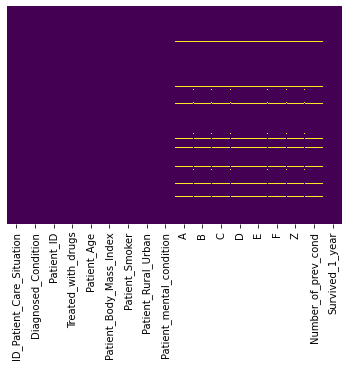

In [13]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [14]:
data.isna().sum()[data.isna().sum()!=0]*100/data.shape[0]>50

Treated_with_drugs     False
A                      False
B                      False
C                      False
D                      False
E                      False
F                      False
Z                      False
Number_of_prev_cond    False
dtype: bool

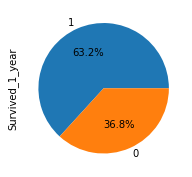

In [15]:
data.Survived_1_year.value_counts().plot(kind="pie", autopct='%.1f%%', figsize=(3,3))

In [16]:
data.isnull().sum().sum()

9893

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23097 entries, 0 to 23096
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  23097 non-null  int64  
 1   Diagnosed_Condition        23097 non-null  int64  
 2   Patient_ID                 23097 non-null  int64  
 3   Treated_with_drugs         23084 non-null  object 
 4   Patient_Age                23097 non-null  int64  
 5   Patient_Body_Mass_Index    23097 non-null  float64
 6   Patient_Smoker             23097 non-null  object 
 7   Patient_Rural_Urban        23097 non-null  object 
 8   Patient_mental_condition   23097 non-null  object 
 9   A                          21862 non-null  float64
 10  B                          21862 non-null  float64
 11  C                          21862 non-null  float64
 12  D                          21862 non-null  float64
 13  E                          21862 non-null  flo

In [18]:
data.head(2)

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1


In [19]:
data.isna().sum().sum()

9893

In [20]:
data['A'].fillna(data['A'].mode()[0],inplace=True)

In [21]:
data['B'].fillna(data['B'].mode()[0],inplace=True)

In [22]:
data['C'].fillna(data['C'].mode()[0],inplace=True)

In [23]:
data['D'].fillna(data['D'].mode()[0],inplace=True)

In [24]:
data['E'].fillna(data['E'].mode()[0],inplace=True)

In [25]:
data['F'].fillna(data['F'].mode()[0],inplace=True)

In [26]:
data['Z'].fillna(data['Z'].mode()[0],inplace=True)

In [27]:
data['Treated_with_drugs'].fillna(data['Treated_with_drugs'].mode()[0],inplace=True)

In [28]:
data.isnull().sum().sum()

1235

In [29]:
data.Number_of_prev_cond.isnull().sum()

1235

In [30]:
data['Number_of_prev_cond'].fillna(data['Number_of_prev_cond'].mean(),inplace=True)

In [31]:
data.isnull().sum().sum()

0

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23097 entries, 0 to 23096
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  23097 non-null  int64  
 1   Diagnosed_Condition        23097 non-null  int64  
 2   Patient_ID                 23097 non-null  int64  
 3   Treated_with_drugs         23097 non-null  object 
 4   Patient_Age                23097 non-null  int64  
 5   Patient_Body_Mass_Index    23097 non-null  float64
 6   Patient_Smoker             23097 non-null  object 
 7   Patient_Rural_Urban        23097 non-null  object 
 8   Patient_mental_condition   23097 non-null  object 
 9   A                          23097 non-null  float64
 10  B                          23097 non-null  float64
 11  C                          23097 non-null  float64
 12  D                          23097 non-null  float64
 13  E                          23097 non-null  flo

In [33]:
data.nunique()

ID_Patient_Care_Situation    23097
Diagnosed_Condition             53
Patient_ID                   10570
Treated_with_drugs              32
Patient_Age                     78
Patient_Body_Mass_Index      10570
Patient_Smoker                   3
Patient_Rural_Urban              2
Patient_mental_condition         1
A                                2
B                                2
C                                2
D                                2
E                                2
F                                2
Z                                2
Number_of_prev_cond              6
Survived_1_year                  2
dtype: int64

In [34]:
data.Treated_with_drugs.value_counts()

DX6                     8619
DX5                     1909
DX2                     1904
DX1                     1835
DX3                     1830
DX4                     1792
DX1 DX2                  448
DX3 DX4                  448
DX1 DX3                  424
DX4 DX5                  423
DX2 DX4                  419
DX1 DX4                  408
DX3 DX5                  407
DX1 DX5                  402
DX2 DX5                  400
DX2 DX3                  398
DX1 DX2 DX5              103
DX1 DX3 DX5              101
DX1 DX2 DX4               99
DX3 DX4 DX5               96
DX1 DX2 DX3               95
DX2 DX3 DX5               91
DX1 DX3 DX4               90
DX2 DX3 DX4               87
DX2 DX4 DX5               84
DX1 DX4 DX5               80
DX1 DX2 DX3 DX4           24
DX1 DX3 DX4 DX5           24
DX2 DX3 DX4 DX5           22
DX1 DX2 DX4 DX5           18
DX1 DX2 DX3 DX5           14
DX1 DX2 DX3 DX4 DX5        3
Name: Treated_with_drugs, dtype: int64

In [35]:
numeric_column = (data.dtypes[data.dtypes !='object'])

In [36]:
numeric_column

ID_Patient_Care_Situation      int64
Diagnosed_Condition            int64
Patient_ID                     int64
Patient_Age                    int64
Patient_Body_Mass_Index      float64
A                            float64
B                            float64
C                            float64
D                            float64
E                            float64
F                            float64
Z                            float64
Number_of_prev_cond          float64
Survived_1_year                int64
dtype: object

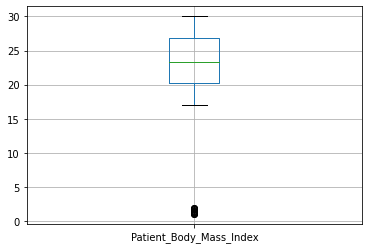

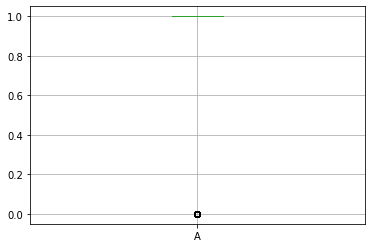

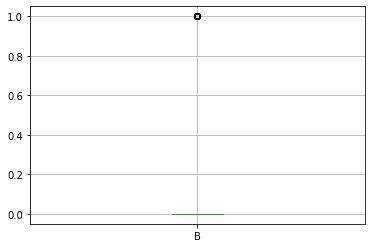

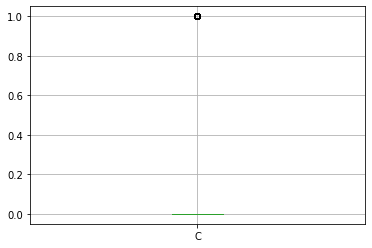

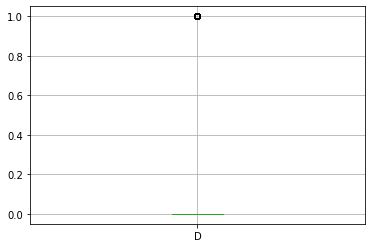

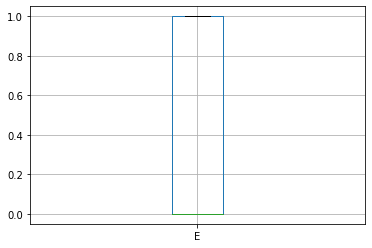

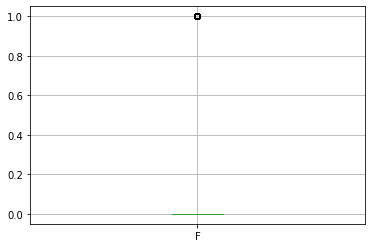

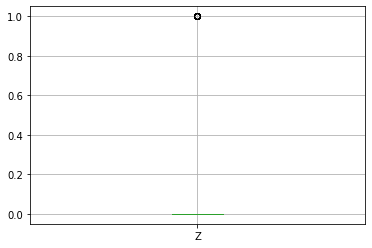

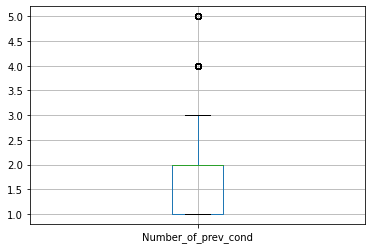

In [37]:
float_column = data.dtypes[data.dtypes=='float64'].index
for x in float_column:
  plt.figure()
  data.boxplot([x])




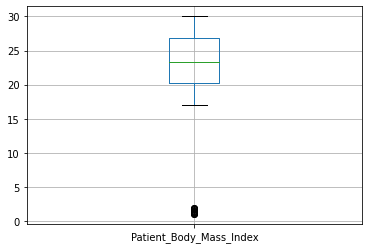

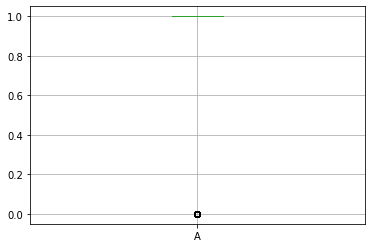

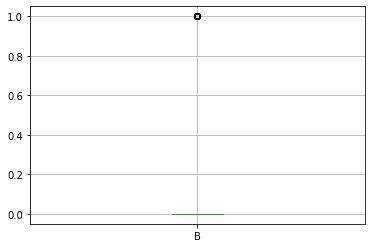

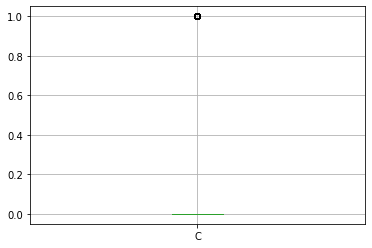

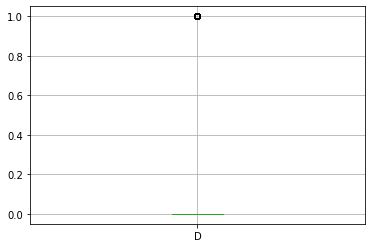

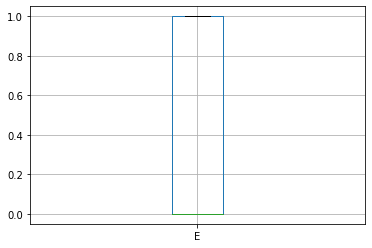

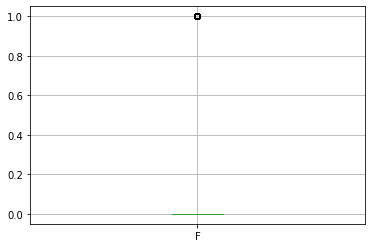

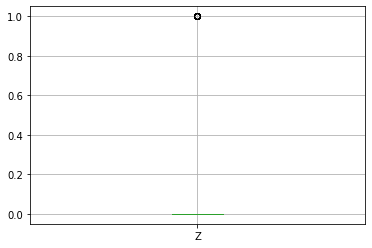

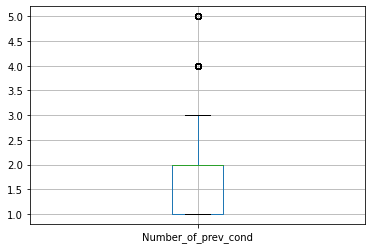

In [38]:
int_column = data.dtypes[data.dtypes=='int64'].index
for x in float_column:
  plt.figure()
  data.boxplot([x])

In [39]:
# for x in float_column:
#   desc = data[x].describe()
#   IQR = desc['75%']- desc['25%']
#   UT = desc['75%']+1.5*IQR
#   LT = desc['25%']-1.5*IQR
#   data[x][data[x]>UT] = UT

In [40]:
# float_column = data.dtypes[data.dtypes=='float64'].index
# for x in float_column:
#   plt.figure()
#   data.boxplot([x])

In [41]:
# for x in float_column:
#   desc = data[x].describe()
#   IQR = desc['75%']- desc['25%']
#   UT = desc['75%']+1.5*IQR
#   LT = desc['25%']-1.5*IQR
#   data[x][data[x]>UT] = UT

In [42]:
# for x in int_column:
#   desc = data[x].describe()
#   IQR = desc['75%']- desc['25%']
#   UT = desc['75%']+1.5*IQR
#   LT = desc['25%']-1.5*IQR
#   data[x][data[x]>UT] = UT

In [43]:
# int_column = data.dtypes[data.dtypes=='int64'].index
# for x in float_column:
#   plt.figure()
#   data.boxplot([x])

In [44]:

# for i in float_column:
#   if 0 in data[i].unique():
#     pass
#   else:
#     data[i]=np.log(data[i])
#     data.boxplot(column=i)
#     plt.ylabel(i)
#     plt.title(i)
#     plt.show()


In [45]:
# for x in float_column:
#   desc = data['Patient_Body_Mass_Index'].describe()
#   IQR = desc['75%']- desc['25%']
#   UT = desc['75%']+1.5*IQR
#   LT = desc['25%']-1.5*IQR
#   data[x][data[x]<UT] = UT

In [46]:
def correlation(data, threshold):
  col_corr = set()
  corr_matrix = data.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j]>threshold):
        col_name = corr_matrix.columns[i]
        col_corr.add(col_name)
  return col_corr

corr_features = correlation(data,0.90)
len(set(corr_features))
corr_features 


set()

In [47]:
data.drop(['A', 'B', 'C', 'D', 'E', 'F', 'Number_of_prev_cond','Z'],axis=1,inplace=True)

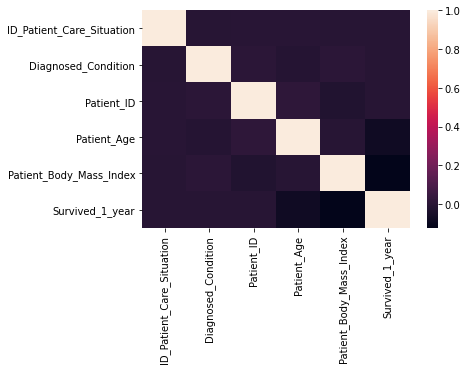

In [48]:
corr = data.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)


In [49]:
x = data.drop('Survived_1_year',axis=1)

In [50]:
data['Survived_1_year'].fillna(data['Survived_1_year'].mean(),inplace=True)

In [51]:
data['Survived_1_year'] = data['Survived_1_year'].astype(int)

In [52]:
y=data['Survived_1_year']

In [53]:
y

0        0
1        1
2        0
3        1
4        1
        ..
23092    0
23093    1
23094    0
23095    1
23096    0
Name: Survived_1_year, Length: 23097, dtype: int64

In [54]:
x

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable
4,33012,0,12513,DX6,128,1.348400,Cannot say,RURAL,Stable
...,...,...,...,...,...,...,...,...,...
23092,15613,3,1548,DX2 DX4,14,18.643448,NO,RURAL,Stable
23093,15503,41,2769,DX6,55,23.684585,NO,RURAL,Stable
23094,2167,24,7671,DX6,63,27.500039,YES,RURAL,Stable
23095,31646,11,5764,DX3,25,23.719125,YES,RURAL,Stable


In [55]:
x.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable
4,33012,0,12513,DX6,128,1.348400,Cannot say,RURAL,Stable


In [56]:
x = pd.get_dummies(x)

In [57]:
x

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,Treated_with_drugs_DX1,Treated_with_drugs_DX1 DX2,Treated_with_drugs_DX1 DX2 DX3,Treated_with_drugs_DX1 DX2 DX3 DX4,Treated_with_drugs_DX1 DX2 DX3 DX4 DX5,Treated_with_drugs_DX1 DX2 DX3 DX5,Treated_with_drugs_DX1 DX2 DX4,Treated_with_drugs_DX1 DX2 DX4 DX5,Treated_with_drugs_DX1 DX2 DX5,Treated_with_drugs_DX1 DX3,Treated_with_drugs_DX1 DX3 DX4,Treated_with_drugs_DX1 DX3 DX4 DX5,Treated_with_drugs_DX1 DX3 DX5,Treated_with_drugs_DX1 DX4,Treated_with_drugs_DX1 DX4 DX5,Treated_with_drugs_DX1 DX5,Treated_with_drugs_DX2,Treated_with_drugs_DX2 DX3,Treated_with_drugs_DX2 DX3 DX4,Treated_with_drugs_DX2 DX3 DX4 DX5,Treated_with_drugs_DX2 DX3 DX5,Treated_with_drugs_DX2 DX4,Treated_with_drugs_DX2 DX4 DX5,Treated_with_drugs_DX2 DX5,Treated_with_drugs_DX3,Treated_with_drugs_DX3 DX4,Treated_with_drugs_DX3 DX4 DX5,Treated_with_drugs_DX3 DX5,Treated_with_drugs_DX4,Treated_with_drugs_DX4 DX5,Treated_with_drugs_DX5,Treated_with_drugs_DX6,Patient_Smoker_Cannot say,Patient_Smoker_NO,Patient_Smoker_YES,Patient_Rural_Urban_RURAL,Patient_Rural_Urban_URBAN,Patient_mental_condition_Stable
0,22374,8,3333,56,18.479385,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1
1,18164,5,5740,36,22.945566,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1
2,6283,23,10446,48,27.510027,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1
3,5339,51,12011,5,19.130976,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
4,33012,0,12513,128,1.348400,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23092,15613,3,1548,14,18.643448,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1
23093,15503,41,2769,55,23.684585,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1
23094,2167,24,7671,63,27.500039,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1
23095,31646,11,5764,25,23.719125,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23097 entries, 0 to 23096
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  23097 non-null  int64  
 1   Diagnosed_Condition        23097 non-null  int64  
 2   Patient_ID                 23097 non-null  int64  
 3   Treated_with_drugs         23097 non-null  object 
 4   Patient_Age                23097 non-null  int64  
 5   Patient_Body_Mass_Index    23097 non-null  float64
 6   Patient_Smoker             23097 non-null  object 
 7   Patient_Rural_Urban        23097 non-null  object 
 8   Patient_mental_condition   23097 non-null  object 
 9   Survived_1_year            23097 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 1.8+ MB


In [59]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23097 entries, 0 to 23096
Data columns (total 43 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   ID_Patient_Care_Situation                23097 non-null  int64  
 1   Diagnosed_Condition                      23097 non-null  int64  
 2   Patient_ID                               23097 non-null  int64  
 3   Patient_Age                              23097 non-null  int64  
 4   Patient_Body_Mass_Index                  23097 non-null  float64
 5   Treated_with_drugs_DX1                   23097 non-null  uint8  
 6   Treated_with_drugs_DX1 DX2               23097 non-null  uint8  
 7   Treated_with_drugs_DX1 DX2 DX3           23097 non-null  uint8  
 8   Treated_with_drugs_DX1 DX2 DX3 DX4       23097 non-null  uint8  
 9   Treated_with_drugs_DX1 DX2 DX3 DX4 DX5   23097 non-null  uint8  
 10  Treated_with_drugs_DX1 DX2 DX3 DX5       23097

In [60]:
y.value_counts()

1    14603
0     8494
Name: Survived_1_year, dtype: int64

In [61]:
y

0        0
1        1
2        0
3        1
4        1
        ..
23092    0
23093    1
23094    0
23095    1
23096    0
Name: Survived_1_year, Length: 23097, dtype: int64

In [62]:
smk = SMOTETomek(random_state=20)
X_res,Y_res = smk.fit_sample(x,y)

In [63]:
x_train,x_test,y_train,y_test = train_test_split(X_res,Y_res,test_size = 0.30,random_state = 42)

In [64]:
RFC = RandomForestClassifier(random_state=42,n_estimators=1000,max_depth=5)

In [65]:
RFC.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [66]:
y.isnull().sum().sum()

0

In [67]:
y_pred = RFC.predict(x_test)

In [68]:
accuracy_score(y_pred,y_test)

0.7937673130193906

In [69]:
confusion_matrix(y_test,y_pred)

array([[2789,  863],
       [ 626, 2942]])

In [70]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.82      0.76      0.79      3652\n           1       0.77      0.82      0.80      3568\n\n    accuracy                           0.79      7220\n   macro avg       0.79      0.79      0.79      7220\nweighted avg       0.80      0.79      0.79      7220\n'

In [71]:
rfc = RandomForestClassifier(random_state=42,n_estimators=1000,max_depth=5)

In [72]:
feature = BorutaPy(rfc,n_estimators='auto',verbose=3,random_state=1)

In [73]:
feature.fit(np.array(x_train),np.array(y_train))

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	43
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	43
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	43
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	43
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	43
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	43
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	43
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	17
Tentative: 	5
Rejected: 	21
Iteration: 	9 / 100
Confirmed: 	17
Tentative: 	5
Rejected: 	21
Iteration: 	10 / 100
Confirmed: 	17
Tentative: 	5
Rejected: 	21
Iteration: 	11 / 100
Confirmed: 	17
Tentative: 	5
Rejected: 	21
Iteration: 	12 / 100
Confirmed: 	17
Tentative: 	5
Rejected: 	21
Iteration: 	13 / 100
Confirmed: 	17
Tentative: 	5
Rejected: 	21
Iteration: 	14 / 100
Confirmed: 	17
Tentative: 	5
Rejected: 	21
Iteration: 	15 / 100
Confirmed: 	17
Tentative: 	5
Rejected: 	21
Iteration: 	16 / 100
Confirmed: 	17
Tentative: 	4
Reject

BorutaPy(alpha=0.05,
         estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                          class_weight=None, criterion='gini',
                                          max_depth=5, max_features='auto',
                                          max_leaf_nodes=None, max_samples=None,
                                          min_impurity_decrease=0.0,
                                          min_impurity_split=None,
                                          min_samples_leaf=1,
                                          min_samples_split=2,
                                          min_weight_fraction_leaf=0.0,
                                          n_estimators=123, n_jobs=None,
                                          oob_score=False,
                                          random_state=RandomState(MT19937) at 0x7FB888874BA0,
                                          verbose=0, warm_start=False),
         max_iter=100, n_estimators='a

In [74]:
feature.support_

array([False,  True,  True,  True,  True,  True, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False,  True,  True, False, False, False, False, False,
       False, False,  True, False, False,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True, False])

In [75]:
feature.ranking_

array([ 2,  1,  1,  1,  1,  1,  6, 17, 22, 25, 25, 18, 22, 14,  1, 13, 20,
       10,  4, 10,  1,  1,  8, 19, 21, 16,  6, 10,  3,  1,  5, 12,  1,  1,
        1,  1,  1, 15,  1,  1,  1,  1, 25])

In [76]:
feature.n_features_

18

In [80]:
selected_features  = pd.DataFrame({"Feature":list(x.columns),"Ranking":feature.ranking_})
selected_features.sort_values(by="Ranking")

,Feature,Ranking
21,Treated_with_drugs_DX2,1
29,Treated_with_drugs_DX3,1
14,Treated_with_drugs_DX1 DX3,1
32,Treated_with_drugs_DX3 DX5,1
33,Treated_with_drugs_DX4,1
34,Treated_with_drugs_DX4 DX5,1
35,Treated_with_drugs_DX5,1
36,Treated_with_drugs_DX6,1
38,Patient_Smoker_NO,1
39,Patient_Smoker_YES,1


In [81]:
len(selected_features)

43

In [82]:
x_importtrain = feature.transform(np.array(x_train))

In [83]:
x_importtest =  feature.transform(np.array(x_test))

In [84]:
random_forest_clf = RandomForestClassifier(random_state=11,n_estimators=1000,n_jobs=-1)

In [85]:
random_forest_clf.fit(x_importtrain,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=-1, oob_score=False, random_state=11, verbose=0,
                       warm_start=False)

In [89]:
y_pred_new = random_forest_clf.predict(x_importtest)

In [90]:
accuracy_score(y_test,y_pred_new)

0.8225761772853185

In [91]:
classification_report(y_test,y_pred_new)

'              precision    recall  f1-score   support\n\n           0       0.85      0.79      0.82      3652\n           1       0.80      0.85      0.83      3568\n\n    accuracy                           0.82      7220\n   macro avg       0.82      0.82      0.82      7220\nweighted avg       0.82      0.82      0.82      7220\n'

In [88]:
f1_score(y_test,random_forest_clf.predict(x_importtest))

0.8262579682625797

In [92]:
Result = pd.DataFrame({'Actual':y_test,"predicted":y_pred_new})
Result

,Actual,predicted
0,1,1
1,1,1
2,1,1
3,0,0
4,0,0
...,...,...
7215,0,1
7216,1,1
7217,1,1
7218,1,1


In [94]:
Result.iloc[[7218]]

,Actual,predicted
7218,1,1


[]

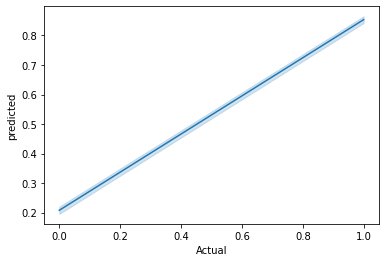

In [107]:
sns.lineplot(x='Actual',y="predicted",data=Result)
plt.plot()